# Chapter 4 Applied Exercises

### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

#### Import packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm
from sklearn import metrics
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#### Import data

In [2]:
df_weekly = pd.read_csv(r'..\Data sets\Weekly.csv')

#### Show the dataframe

In [3]:
df_weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


#### Let's change the *Direction* into 1 for up and 0 for down. 

In [4]:
df_weekly['Direction_Up'] = np.where(df_weekly['Direction'] == 'Up',1,0)
df_weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1
...,...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up,1


#### Drop the direction and then plot via seaborn.

In [5]:
df_weekly_plot = df_weekly.drop(columns=['Direction'])

# sns.pairplot(df_weekly_plot)

#### Draw a correlation matrix

C:\Users\User-PC\AppData\Local\Temp\ipykernel_22724\1002280942.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_weekly.corr().abs()


<Axes: >

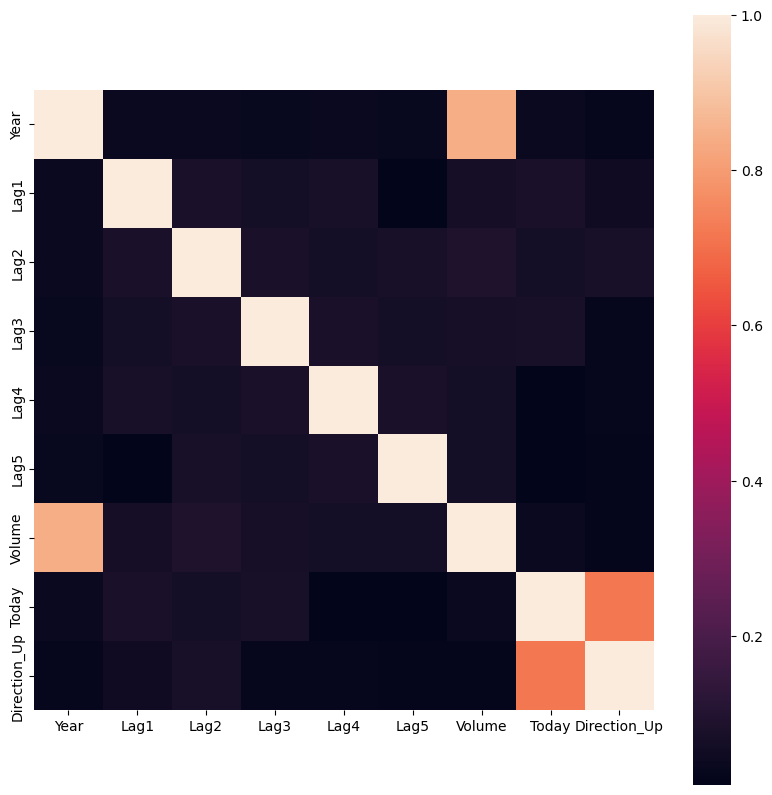

In [6]:
corr_matrix = df_weekly.corr().abs()
fig, ax     = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, vmax=1, square=True)

#### Show some other numerical statistics

In [7]:
df_weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


I do not really see any trends when looking at the pairplots other than the volume of the trades going up exponentially as the year increases. 

### (b) Use the full data set to perform a logistic regression with *Direction* as the response and the five lag variables plus *Volume* as predictors. Use the summary function to print the results. Do any of the predictors appear to be significant. If so, which ones?  

In [8]:
# Fit a logistic regression to predict Direction using Lag1 through Lag5 and Volume.
f_10b = 'Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'

# Set up the model
model_logist_10b = sm.Logit.from_formula(formula=f_10b, data=df_weekly)
results_logist_10b = model_logist_10b.fit()

display(results_logist_10b.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                0.006580
Time:                        16:12:17   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

#### The following values have p-values smaller than 0.05.

In [9]:
display(pd.DataFrame({'p>|z|': results_logist_10b.pvalues[results_logist_10b.pvalues < 0.05].drop('Intercept')}))

,p>|z|
Lag2,0.029601


### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

#### Let's define a function to create a confusion matrix and calculate the confusion matrix statistics, such as accuracy, precision, recall/sensitivity etc. 

In [10]:
y_pred = np.where(results_logist_10b.predict() > 0.5, 1, 0)
metrics.confusion_matrix(df_weekly['Direction_Up'],y_pred)
metrics.accuracy_score(df_weekly['Direction_Up'],y_pred)

0.5610651974288338

In [11]:
def confusion_matrix(confusion_matrix):
    """Return a confusion matrix that is formatted neatly. Takes the sklearn confusion matrix as input and return better formatted confusion matrix.
    Wikepedia's convention is followed: https://en.wikipedia.org/wiki/Confusion_matrix"""
    TP = confusion_matrix[1,1] # True positives
    FP = confusion_matrix[0,1] # False positives
    TN = confusion_matrix[0,0] # True negatives
    FN = confusion_matrix[1,0] # False negatives
    Actual_1_sum = TP + FN # Row 1 sum
    Actual_0_sum = FP + TN # Row 2 sum
    Predict_1_sum = TP + FP # Column 1 sum
    Predict_0_sum = FN + TN # Column 2 sum

    if (Actual_1_sum + Actual_0_sum) != (Predict_1_sum + Predict_0_sum):
        print("There is an error.")
    else:
        Total = Actual_0_sum + Actual_1_sum # Total

    confusion_df = pd.DataFrame({'Predicted 1': [TP,FP,Predict_1_sum],
                                 'Predicted 0': [FN,TN,Predict_0_sum],
                                 'Total': [Actual_1_sum,Actual_0_sum, Total],
                                 '': ['Actual 1', 'Actual 0', 'Total']}).set_index('')
    return confusion_df

def confusion_matrix_metrics(y_true,y_pred,confusion_matrix,decimal_places,col_name):
    """Show all the metrics of the confusion matrix in a neatly formatted way. Uses the sklearn metrics functions.
    Inputs are y_actual, y_pred, confusion_matrix from sklearn, decimal places, and name of the model"""

    # Get metrics
    accuracy = round(metrics.accuracy_score(y_true,y_pred),decimal_places)
    precision = round(metrics.precision_score(y_true,y_pred),decimal_places)
    recall = round(metrics.recall_score(y_true,y_pred),decimal_places)
    F_score = round(metrics.f1_score(y_true,y_pred),decimal_places)
    auc = round(metrics.roc_auc_score(y_true,y_pred),decimal_places)

    # Define true positives, false positives, true negatives, and false negatives
    TP = confusion_matrix[1,1] # True positives
    FP = confusion_matrix[0,1] # False positives
    TN = confusion_matrix[0,0] # True negatives
    FN = confusion_matrix[1,0] # False negatives

    # Sum these values
    Actual_1_sum = TP + FN # Row 1 sum
    Actual_0_sum = FP + TN # Row 2 sum
    Predict_1_sum = TP + FP # Column 1 sum
    Predict_0_sum = FN + TN # Column 2 sum
    
    # Calculate some more metrics
    true_positive_rate = round(TP/(TP+FN),decimal_places)
    false_positive_rate = round(FP/(FP+TN),decimal_places)

    # Create row names
    rows = ['Accuracy', 'Precision', 'Recall', 'F-score', 'True positive rate', 'False positive rate','Area under ROC curve']

    # Create column values
    columns = [accuracy,precision,recall,F_score,true_positive_rate,false_positive_rate,auc]     

    # Create a dataframe to display the values
    result = pd.DataFrame({str(col_name):columns},index=rows)
    return result


In [12]:
cm = results_logist_10b.pred_table(threshold=0.5)
confusion_matrix(cm)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,557.0,48.0,605.0
Actual 0,430.0,54.0,484.0
Total,987.0,102.0,1089.0


In [13]:
cm = results_logist_10b.pred_table(threshold=0.5)
logist_metrics = confusion_matrix_metrics(df_weekly['Direction_Up'],y_pred,cm,4,'Logistic regression')
logist_metrics

,Logistic regression
Accuracy,0.5611
Precision,0.5643
Recall,0.9207
F-score,0.6997
True positive rate,0.9207
False positive rate,0.8884
Area under ROC curve,0.5161


The overall fraction of correct predictions is called the accuracy ($\frac{(TP+TN)}{total}$). The accuracy is 56%. The model correctly predicts when the market will go up 56% of the time. The precision ($\frac{(TP)}{TP+FP}$) is also 56%, meaning that there are a lot of instances where the market went down where the model predicts that the market will go up. The recall ($\frac{TP}{TP+FN}$) is 92%, but that is not useful if the precision is low, as is the case in our model. A high precision can be achieved by always predicting the market will go up, but that does not mean the precision is high.

### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [14]:
# Create the training and testing sets
df_weekly_train = df_weekly[df_weekly['Year'] < 2009]
df_weekly_test = df_weekly[df_weekly['Year'] >= 2009]

# If we split correctly, the amount of rows in the train and test set must add up to the original dataframe
len(df_weekly_train)+len(df_weekly_test) == len(df_weekly)

True

In [15]:
# Fit a logistic regression to predict Direction using Lag2
f_10d = 'Direction_Up ~ Lag2'

# Set up the model
model_logist_10d = sm.Logit.from_formula(formula=f_10d, data=df_weekly_train)
results_logist_10d = model_logist_10d.fit()

display(results_logist_10d.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                0.003076
Time:                        16:12:17   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

In [16]:
# Get predictions from the test set
y_pred = np.where(results_logist_10d.predict(df_weekly_test) > 0.5, 1, 0)

#### Confusion matrix

In [17]:
cm = metrics.confusion_matrix(df_weekly_test['Direction_Up'],y_pred)
confusion_matrix(cm)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,56,5,61
Actual 0,34,9,43
Total,90,14,104


#### Confusion matrix metrics

In [18]:
logist_metrics_10d = confusion_matrix_metrics(df_weekly_test['Direction_Up'],y_pred,cm,4,'Logistic regression Lag2')
logist_metrics_10d

,Logistic regression Lag2
Accuracy,0.6250
Precision,0.6222
Recall,0.9180
F-score,0.7417
True positive rate,0.9180
False positive rate,0.7907
Area under ROC curve,0.5637


### (e) Repeat (d) using LDA.

In [19]:
# Linear discriminant analysis
lda = LDA(store_covariance=True)

# Set up design matrices
X_train = np.array(df_weekly_train['Lag2']).reshape(-1,1) # The array must be in the shape (n_samples,n_predictors)
X_test = np.array(df_weekly_test['Lag2']).reshape(-1,1) # The array must be in the shape (n_samples,n_predictors)
y_train = np.array(df_weekly_train['Direction_Up'])
y_test = np.array(df_weekly_test['Direction_Up'])

# Fit the model
lda.fit(X_train,y_train)

# Get predictions
y_pred_LDA = lda.predict(X_test)

#### Confusion matrix

In [20]:
cm_LDA = metrics.confusion_matrix(y_test,y_pred_LDA)
confusion_matrix(cm_LDA)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,56,5,61
Actual 0,34,9,43
Total,90,14,104


#### Confusion matrix metrics

In [21]:
LDA_metrics = confusion_matrix_metrics(y_test,y_pred_LDA,cm_LDA,4,'LDA')
LDA_metrics

,LDA
Accuracy,0.6250
Precision,0.6222
Recall,0.9180
F-score,0.7417
True positive rate,0.9180
False positive rate,0.7907
Area under ROC curve,0.5637


### (f) Repeat (d) using QDA.

In [22]:
# Fit the model
qda = QDA(store_covariance = True)
qda.fit(X_train,y_train)

# Make predictions
y_pred_QDA = qda.predict(X_test)

#### Confusion matrix

In [23]:
cm_QDA = metrics.confusion_matrix(y_test,y_pred_QDA)
confusion_matrix(cm_QDA)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,61,0,61
Actual 0,43,0,43
Total,104,0,104


#### Confusion matrix metrics

In [24]:
QDA_metrics = confusion_matrix_metrics(y_test,y_pred_QDA,cm_QDA,4,'QDA')
QDA_metrics

,QDA
Accuracy,0.5865
Precision,0.5865
Recall,1.0000
F-score,0.7394
True positive rate,1.0000
False positive rate,1.0000
Area under ROC curve,0.5000


### (g) Repeat (d) using KNN with K = 1.

In [25]:
# Set up the model
knn1 = KNeighborsClassifier(n_neighbors=1)

# Fit the model

knn1.fit(X_train, y_train)

# Make predictions
y_pred_KNN = knn1.predict(X_test)

#### Confusion matrix

In [26]:
cm_KNN = metrics.confusion_matrix(y_test, y_pred_KNN)
confusion_matrix(cm_KNN)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,31,30,61
Actual 0,21,22,43
Total,52,52,104


#### Confusion matrix metrics

In [27]:
KNN_metrics = confusion_matrix_metrics(y_test, y_pred_KNN, cm_KNN, 4, 'KNN')
KNN_metrics

,KNN
Accuracy,0.5096
Precision,0.5962
Recall,0.5082
F-score,0.5487
True positive rate,0.5082
False positive rate,0.4884
Area under ROC curve,0.5099


### (h) Repeat (d) using Naive-Bayes

In [28]:
# Create the model
NB = GaussianNB()

# Fit the model
NB.fit(X_train, y_train)

# Make predictions
y_pred_NB = NB.predict(X_test)

#### Confusion matrix

In [29]:
cm_NB = metrics.confusion_matrix(y_test, y_pred_NB)
confusion_matrix(cm_NB)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,61,0,61
Actual 0,43,0,43
Total,104,0,104


#### Confusion matrix metrics

In [30]:
NB_metrics = confusion_matrix_metrics(y_test, y_pred, cm_NB, 4, 'Naive-Bayes')
NB_metrics

,Naive-Bayes
Accuracy,0.6250
Precision,0.6222
Recall,0.9180
F-score,0.7417
True positive rate,1.0000
False positive rate,1.0000
Area under ROC curve,0.5637


### (i) Which of these methods appears to provide the best results on this data?

In [31]:
# Let's merge all the metric dataframes
df_merge_list = [logist_metrics, logist_metrics_10d, LDA_metrics, QDA_metrics, KNN_metrics, NB_metrics]
df_metrics = pd.concat(df_merge_list, axis=1)
df_metrics

,Logistic regression,Logistic regression Lag2,LDA,QDA,KNN,Naive-Bayes
Accuracy,0.5611,0.6250,0.6250,0.5865,0.5096,0.6250
Precision,0.5643,0.6222,0.6222,0.5865,0.5962,0.6222
Recall,0.9207,0.9180,0.9180,1.0000,0.5082,0.9180
F-score,0.6997,0.7417,0.7417,0.7394,0.5487,0.7417
True positive rate,0.9207,0.9180,0.9180,1.0000,0.5082,1.0000
False positive rate,0.8884,0.7907,0.7907,1.0000,0.4884,1.0000
Area under ROC curve,0.5161,0.5637,0.5637,0.5000,0.5099,0.5637


The F-scores for Logistic regression with only Lag 2, LDA, and Naive-Bayes are the largest. It is tempting to say these models are the best based on the F-score. But Naive-Bayes has a false negative rate of 1, so the model never predicts a stock will go down when it does. That is not good. So Logistic Regression with Lag 2 and LDA seem the best. 

# 11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the *Auto* data set.

### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median.

In [32]:
# Import the data set
df_auto = pd.read_csv(r'..\Data sets\Auto.csv').set_index('name')

In [33]:
# Change the index to name and drop the '?' in 'horsepower', then convert the column to numeric values
df_auto = df_auto[pd.to_numeric(df_auto['horsepower'], errors='coerce').notnull()]
df_auto['horsepower'] = pd.to_numeric(df_auto['horsepower'])

In [34]:
# Calculate the median
median_mpg = df_auto['mpg'].median()

# Create a new column called mpg01 - if the mpg is > median = 1
df_auto['mpg01'] = np.where(df_auto['mpg'] > median_mpg,1,0)

### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

<Axes: >

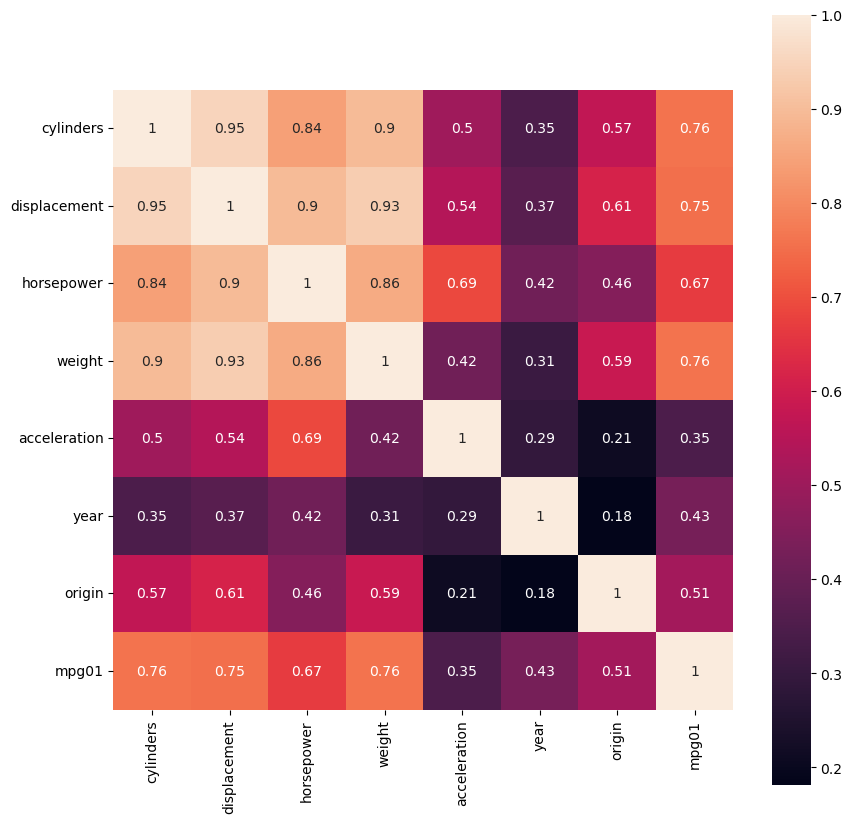

In [35]:
# Create a correlation matrix
corr_matrix_auto = df_auto.drop(columns=['mpg']).corr().abs()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix_auto, vmax=1, square=True,annot=True)

It seems that mpg is closely correlated with cylinders, displacement, and horsepower.

### (c) Split the data into a training set and a test set.

In [36]:
# Split data into X and y variables
X = df_auto.drop(columns=['mpg','mpg01','acceleration','year','origin'])
y = df_auto['mpg01']

# Split into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [37]:
# Linear discriminant analysis
lda_auto = LDA(store_covariance=True)

# Fit the model
lda_auto.fit(X_train,y_train)

# Get predictions
y_pred_auto_LDA = lda_auto.predict(X_test)

#### Confusion matrix

In [38]:
cm_auto_LDA = metrics.confusion_matrix(y_test, y_pred_auto_LDA)
confusion_matrix(cm_auto_LDA)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,58,2,60
Actual 0,18,52,70
Total,76,54,130


#### Confusion matrix metrics

In [39]:
metrics_auto_LDA = confusion_matrix_metrics(y_test, y_pred_auto_LDA, cm_auto_LDA, 4, 'LDA')
metrics_auto_LDA

,LDA
Accuracy,0.8462
Precision,0.7632
Recall,0.9667
F-score,0.8529
True positive rate,0.9667
False positive rate,0.2571
Area under ROC curve,0.8548


### (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [40]:
# Fit the model
qda_auto = QDA(store_covariance = True)
qda_auto.fit(X_train,y_train)

# Make predictions
y_pred_auto_QDA = qda_auto.predict(X_test)

#### Confusion matrix

In [41]:
cm_auto_QDA = metrics.confusion_matrix(y_test, y_pred_auto_QDA)
confusion_matrix(cm_auto_QDA)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,57,3,60
Actual 0,18,52,70
Total,75,55,130


#### Confusion matrix metrics

In [42]:
metrics_auto_QDA = confusion_matrix_metrics(y_test, y_pred_auto_LDA, cm_auto_QDA, 4, 'QDA')
metrics_auto_QDA

,QDA
Accuracy,0.8462
Precision,0.7632
Recall,0.9667
F-score,0.8529
True positive rate,0.9500
False positive rate,0.2571
Area under ROC curve,0.8548


### (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [43]:
# Set up the model
logist_auto = LogisticRegression()

# Fit the model
results_logist_auto = logist_auto.fit(X_train,y_train)

# Make predictions
y_pred_auto_logist = results_logist_auto.predict(X_test)

#### Confusion matrix

In [44]:
cm_auto_logist = metrics.confusion_matrix(y_test, y_pred_auto_logist)
confusion_matrix(cm_auto_logist)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,58,2,60
Actual 0,20,50,70
Total,78,52,130


#### Confusion matrix metrics

In [45]:
metrics_auto_logist = confusion_matrix_metrics(y_test, y_pred_auto_logist, cm_auto_logist, 4, 'Logistic regression')
metrics_auto_logist

,Logistic regression
Accuracy,0.8308
Precision,0.7436
Recall,0.9667
F-score,0.8406
True positive rate,0.9667
False positive rate,0.2857
Area under ROC curve,0.8405


### (g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [46]:
# Create the model
NB_auto = GaussianNB()

# Fit the model
NB_auto.fit(X_train, y_train)

# Make predictions
y_pred_auto_NB = NB_auto.predict(X_test)

#### Confusion matrix

In [47]:
cm_auto_NB = metrics.confusion_matrix(y_test, y_pred_auto_NB)
confusion_matrix(cm_auto_NB)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,58,2,60
Actual 0,17,53,70
Total,75,55,130


#### Confusion matrix metrics

In [48]:
metrics_auto_NB = confusion_matrix_metrics(y_test, y_pred_auto_logist, cm_auto_NB, 4, 'Naive-Bayes')
metrics_auto_NB

,Naive-Bayes
Accuracy,0.8308
Precision,0.7436
Recall,0.9667
F-score,0.8406
True positive rate,0.9667
False positive rate,0.2429
Area under ROC curve,0.8405


### (h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [49]:
# Set up the model
knn_auto = KNeighborsClassifier(n_neighbors=1)

# Fit the model
knn_auto.fit(X_train, y_train)

# Make predictions
y_pred_auto_KNN = knn_auto.predict(X_test)

#### Confusion matrix

In [50]:
cm_auto_KNN = metrics.confusion_matrix(y_test, y_pred_auto_KNN)
confusion_matrix(cm_auto_KNN)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,57,3,60
Actual 0,17,53,70
Total,74,56,130


#### Confusion matrix metrics

In [51]:
metrics_auto_KNN = confusion_matrix_metrics(y_test, y_pred_auto_KNN, cm_auto_KNN, 4, 'KNN')
metrics_auto_KNN

,KNN
Accuracy,0.8462
Precision,0.7703
Recall,0.9500
F-score,0.8507
True positive rate,0.9500
False positive rate,0.2429
Area under ROC curve,0.8536


In [52]:
# Let's merge all the metric dataframes
df_merge_list_auto = [metrics_auto_logist, metrics_auto_LDA, metrics_auto_QDA, metrics_auto_NB, metrics_auto_KNN]
df_metrics_auto = pd.concat(df_merge_list_auto, axis=1)
df_metrics_auto

,Logistic regression,LDA,QDA,Naive-Bayes,KNN
Accuracy,0.8308,0.8462,0.8462,0.8308,0.8462
Precision,0.7436,0.7632,0.7632,0.7436,0.7703
Recall,0.9667,0.9667,0.9667,0.9667,0.9500
F-score,0.8406,0.8529,0.8529,0.8406,0.8507
True positive rate,0.9667,0.9667,0.9500,0.9667,0.9500
False positive rate,0.2857,0.2571,0.2571,0.2429,0.2429
Area under ROC curve,0.8405,0.8548,0.8548,0.8405,0.8536
